In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import warnings
import tensorflow as tf
from keras.layers import Input, Embedding, Flatten, Dot, Dense, Concatenate
from keras.models import Model

In [2]:
tourisim = pd.read_csv('./data/tourism_rating.csv')

In [3]:
tourisim.describe()

,User_Id,Place_Id,Place_Ratings
count,10000.000000,10000.000000,10000.000000
mean,151.292700,219.416400,3.066500
std,86.137374,126.228335,1.379952
min,1.000000,1.000000,1.000000
25%,77.000000,108.750000,2.000000
50%,151.000000,220.000000,3.000000
75%,226.000000,329.000000,4.000000
max,300.000000,437.000000,5.000000


In [4]:
tourisim.head()

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4


In [5]:
tourisim.shape

(10000, 3)

In [7]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(tourisim, test_size=0.2, random_state=42)

In [10]:
n_users = len(tourisim.User_Id.unique())
n_tourisms = len(tourisim.Place_Id.unique())

In [11]:
# creating book embedding path
tourism_input = Input(shape=[1], name="Tourism-Input")
tourism_embedding = Embedding(n_tourisms+1, 5, name="Tourism-Embedding")(tourism_input)
tourism_vec = Flatten(name="Flatten-Tourism")(tourism_embedding)

# creating user embedding path
user_input = Input(shape=[1], name="User-Input")
user_embedding = Embedding(n_users+1, 5, name="User-Embedding")(user_input)
user_vec = Flatten(name="Flatten-Users")(user_embedding)

# concatenate features
conc = Concatenate()([tourism_vec, user_vec])

# add fully-connected-layers
fc1 = Dense(256, activation='relu')(conc)
fc2 = Dense(128, activation='relu')(fc1)
fc3 = Dense(128, activation='relu')(fc2)
out = Dense(1)(fc3)

# Create model and compile it
model = Model([user_input, tourism_input], out)
model.compile('adam', 'mean_squared_error')

In [12]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Tourism-Input (InputLayer)     [(None, 1)]          0           []                               
                                                                                                  
 User-Input (InputLayer)        [(None, 1)]          0           []                               
                                                                                                  
 Tourism-Embedding (Embedding)  (None, 1, 5)         2190        ['Tourism-Input[0][0]']          
                                                                                                  
 User-Embedding (Embedding)     (None, 1, 5)         1505        ['User-Input[0][0]']             
                                                                                              

In [13]:
history = model.fit([train.User_Id, train.Place_Id], train.Place_Ratings, epochs=100, verbose=1)


Epoch 1/100
250/250 [==============================] - 2s 2ms/step - loss: 2.5590
Epoch 2/100
250/250 [==============================] - 0s 1ms/step - loss: 1.8874
Epoch 3/100
250/250 [==============================] - 0s 1ms/step - loss: 1.8266
Epoch 4/100
250/250 [==============================] - 0s 1ms/step - loss: 1.7994
Epoch 5/100
250/250 [==============================] - 0s 1ms/step - loss: 1.7595
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 1.7252
Epoch 7/100
250/250 [==============================] - 1s 3ms/step - loss: 1.6615
Epoch 8/100
250/250 [==============================] - 1s 5ms/step - loss: 1.5798
Epoch 9/100
250/250 [==============================] - 1s 5ms/step - loss: 1.5127
Epoch 10/100
250/250 [==============================] - 1s 5ms/step - loss: 1.4264
Epoch 11/100
250/250 [==============================] - 1s 5ms/step - loss: 1.3593
Epoch 12/100
250/250 [==============================] - 1s 5ms/step - loss: 1.2989
Epoch 13/100


Text(0, 0.5, 'Training Error')

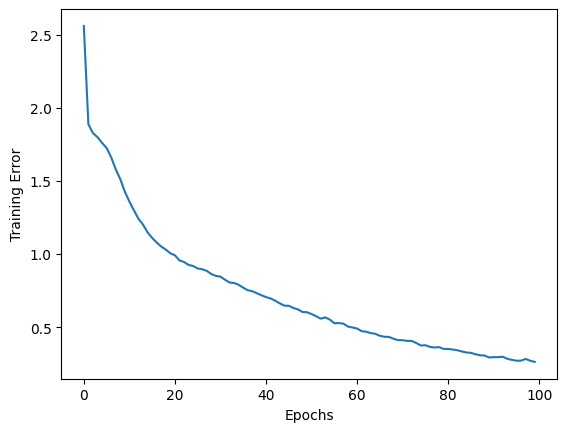

In [14]:
plt.plot(history.history['loss'])
plt.xlabel("Epochs")
plt.ylabel("Training Error")

In [16]:
id_place = range(1,20)

# Creating dataset for making recommendations for the first user
tourism_data = np.array(list(set(tourisim.Place_Id)))
tourism_data[:10]

id_user = 3
user = np.array([id_user for i in range(len(tourism_data))])
user[:10]

predictions = model.predict([user, tourism_data])

predictions = np.array([a[0] for a in predictions])

recommended_tourism_ids = (-predictions).argsort()[:10]

recommended_tourism_ids

# print predicted scores
predictions[recommended_tourism_ids]

14/14 [==============================] - 0s 2ms/step


array([6.873911 , 6.7435493, 6.507132 , 6.287391 , 6.062516 , 6.0503993,
       5.982196 , 5.9544   , 5.8259044, 5.7895827], dtype=float32)